In [1]:
import numpy as np
import pandas as pd
from divination import Divination

In [2]:
dates = [np.datetime64('2020-01-01') + np.timedelta64(idx, 'D') for idx in range(256)]
sin = np.sin(np.linspace(0, 4 * 2 * np.pi, len(dates)))
cos = np.cos(np.linspace(0, 4 * 2 * np.pi, len(dates)))
combined = sin + cos

In [3]:
data = pd.DataFrame.from_dict({
    'date': dates,
    'sin': sin,
    'cos': cos,
    'combined': combined
}).set_index('date')
data

,sin,cos,combined
date,,,
2020-01-01,0.000000e+00,1.000000,1.000000
2020-01-02,9.840028e-02,0.995147,1.093547
2020-01-03,1.958455e-01,0.980635,1.176480
2020-01-04,2.913897e-01,0.956604,1.247994
2020-01-05,3.841057e-01,0.923289,1.307395
...,...,...,...
2020-09-08,-3.841057e-01,0.923289,0.539183
2020-09-09,-2.913897e-01,0.956604,0.665215
2020-09-10,-1.958455e-01,0.980635,0.784789


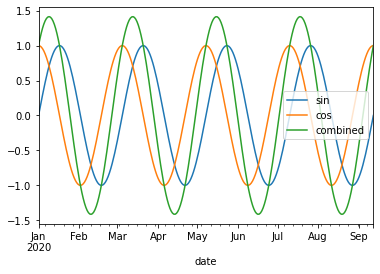

In [4]:
data.plot()

In [5]:
predictions = Divination().fit(data).predict(data, num_steps=256)
predictions

,sin,cos,combined
date,,,
2020-01-01,0.000000,1.000000,1.000000
2020-01-02,0.098400,0.995147,1.093547
2020-01-03,0.195845,0.980635,1.176480
2020-01-04,0.291390,0.956604,1.247994
2020-01-05,0.384106,0.923289,1.307395
...,...,...,...
2021-05-22,-1.113413,0.207524,-0.899193
2021-05-23,-1.098481,0.283628,-0.807683
2021-05-24,-1.078239,0.358435,-0.712192


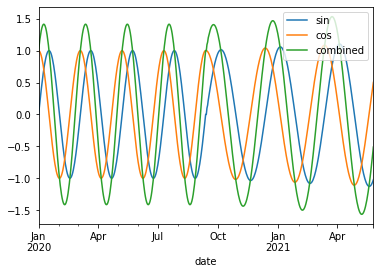

In [6]:
predictions.plot()